<a href="https://colab.research.google.com/github/Meera-Ajay-25/LGMVIP-DataScience/blob/main/LGMVIP_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***LETS GROW MORE***

Data Science Internship(LGMVIP-SEPT 2021)

**TASK 1** : Iris flower classification.

problem : predict the optimum number of clusters and represent it visually

By : Meera Ajayakumar


**IMPORT THE REQUIRED LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

**READING DATA FILE**

In [ ]:
Iris = pd.read_csv('/content/Iris data.csv')
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**CHECKING FOR MISSING VALUES**



In [ ]:
Iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Hence there are no missing values

**EXPLORATORY DATA ANALYSIS**


Analysing the statistical values

In [ ]:
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
Iris.shape

(150, 6)

The above feature tells that the dataset has 150 rows and from mean we can say that sepal is larger than petal

In [ ]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Analysing the column species and plotting the distribution of species using count plot

In [ ]:
Iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


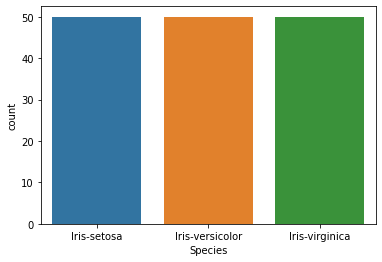

In [ ]:
sns.countplot(Iris['Species'])

Hence from the above plot we can see that the classes are equally distributed 

**DATA VISUALIZATION**

visualization using pair plot

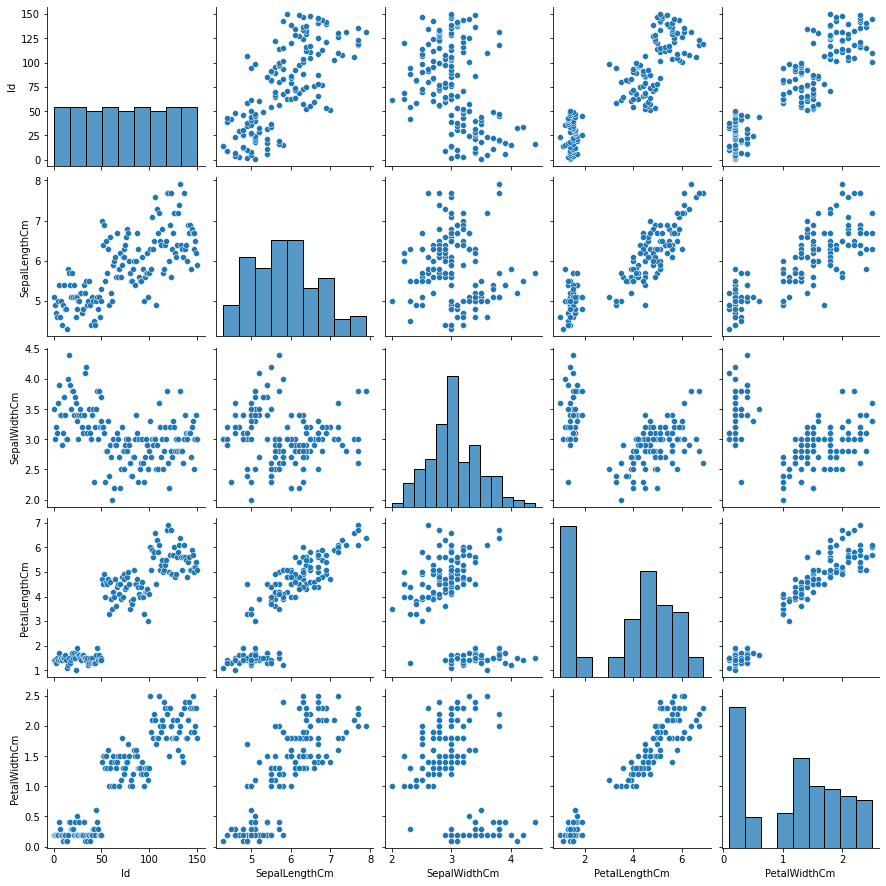

In [ ]:
sns.pairplot(Iris)

Finding the correlation between the variables and plotting it using heat map

In [ ]:
Iris.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


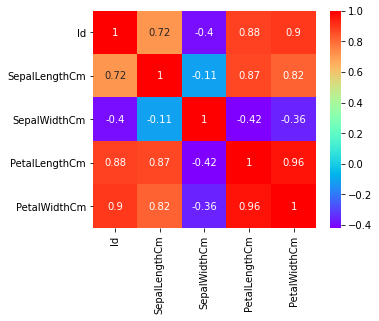

In [ ]:
corr = Iris.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='rainbow')
plt.show()

**Determining optimum number of clusters using Elbow method**

In [ ]:
#we can determine the optimum number of cluster using elbow method
p = Iris.iloc[:,[0,1,2,3]].values

In [ ]:
#optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

In [ ]:
w = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',max_iter = 300, n_init=10,random_state=0)
    kmeans.fit(p)
    w.append(kmeans.inertia_)

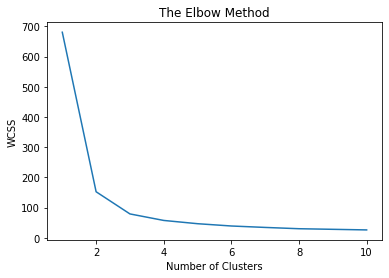

In [ ]:
plt.plot(range(1,11),w)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The optimum clusters is where the elbow occurs

**APPLYING KMEAN CLUSTERING**

In [ ]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++',max_iter = 300, n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(p)
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

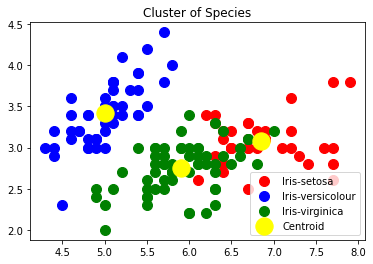

In [ ]:
plt.scatter(p[y_kmeans==0,0], p[y_kmeans==0,1],s = 100,c = 'red', label = 'Iris-setosa')
plt.scatter(p[y_kmeans==1,0], p[y_kmeans==1,1],s = 100,c = 'blue', label = 'Iris-versicolour')
plt.scatter(p[y_kmeans==2,0], p[y_kmeans==2,1],s = 100,c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroid')
plt.title("Cluster of Species")
plt.legend()
plt.show()

SO WE CAN CONCLUDE THAT THE OPTIMUM NUMBER OF CLUSTERS IS 3

END OF TASK 1

**THANK YOU!!!**